In [2]:
import pandas as pd
import os

In [3]:
movies = pd.read_csv('C:\\Users\\gbier\\Desktop\\Python A-Z\\P4-Movie-Ratings.csv')

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [8]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
#Convert variables into categorical variables
movies.Film = movies.Film.astype('category')

movies.info

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [13]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [15]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

movies.info()

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

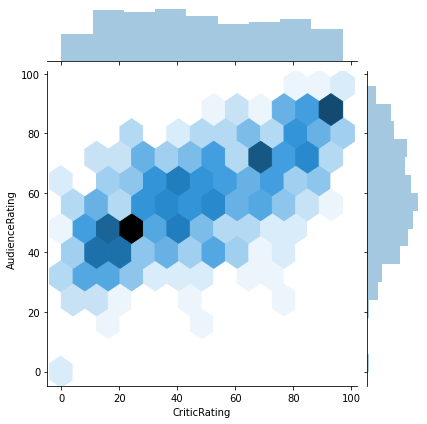

In [17]:
#Jointplonts

j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex' )

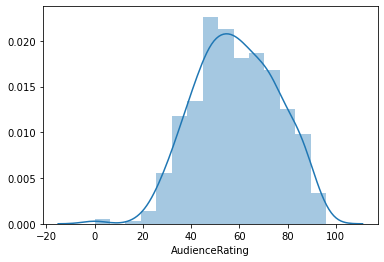

In [18]:
#Histograms
m2 = sns.distplot(movies.AudienceRating, bins=15)

In [18]:
#Stacked Histogram

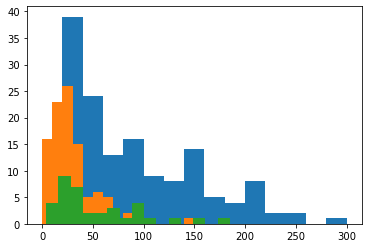

In [19]:
plt.hist(movies[movies.Genre =='Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre =='Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre =='Thriller'].BudgetMillions, bins=15)
plt.show()

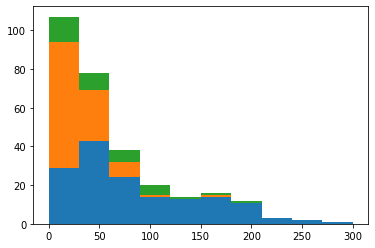

In [20]:
plt.hist([movies[movies.Genre =='Action'].BudgetMillions, movies[movies.Genre =='Drama'].BudgetMillions, movies[movies.Genre =='Thriller'].BudgetMillions], stacked=True)
plt.show()

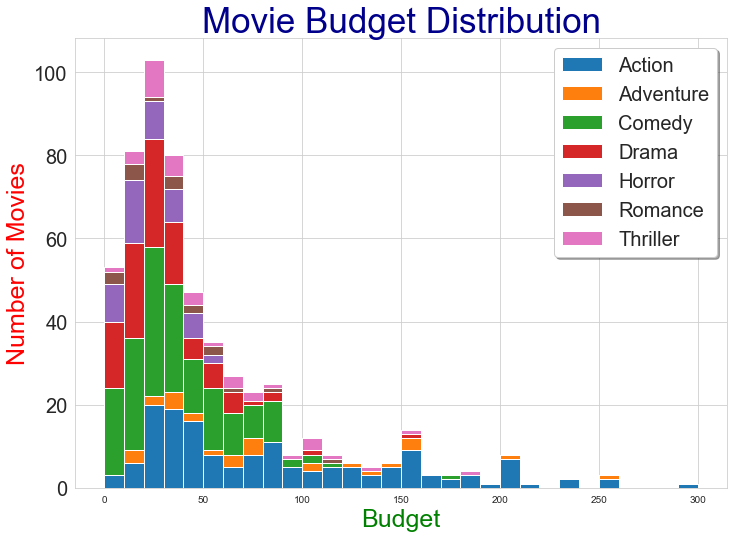

In [103]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
h = plt.hist(list1, bins=30, stacked=True, rwidth = 1, label=mylabels)
plt.title('Movie Budget Distribution', fontsize=35, color='DarkBlue')
plt.ylabel('Number of Movies', fontsize=25, color='Red')
plt.xlabel('Budget', fontsize=25, color='Green')
plt.yticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':20})
plt.show()

In [44]:
#KDE Plot

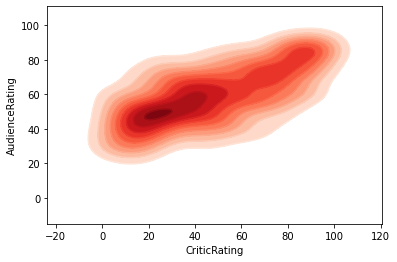

In [22]:
kl = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')
klb = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

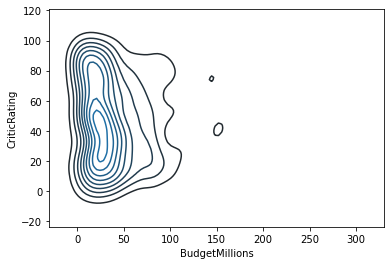

In [23]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20.0, 160.0)]

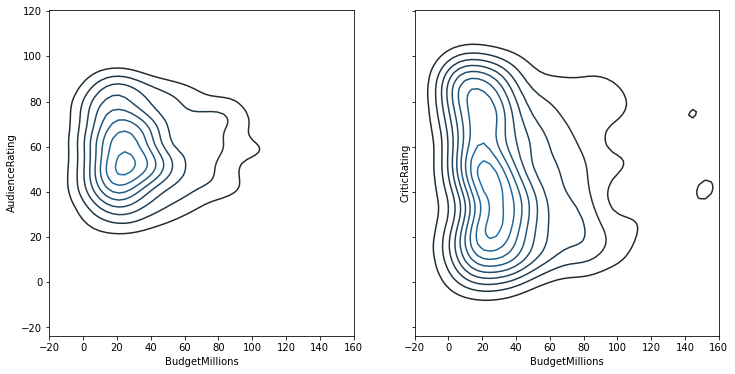

In [33]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

In [34]:
#violinplots

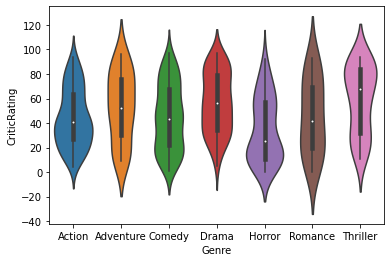

In [37]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

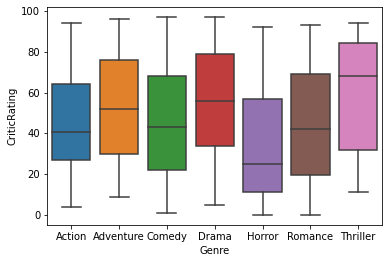

In [38]:
w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

In [39]:
#Facet Grids

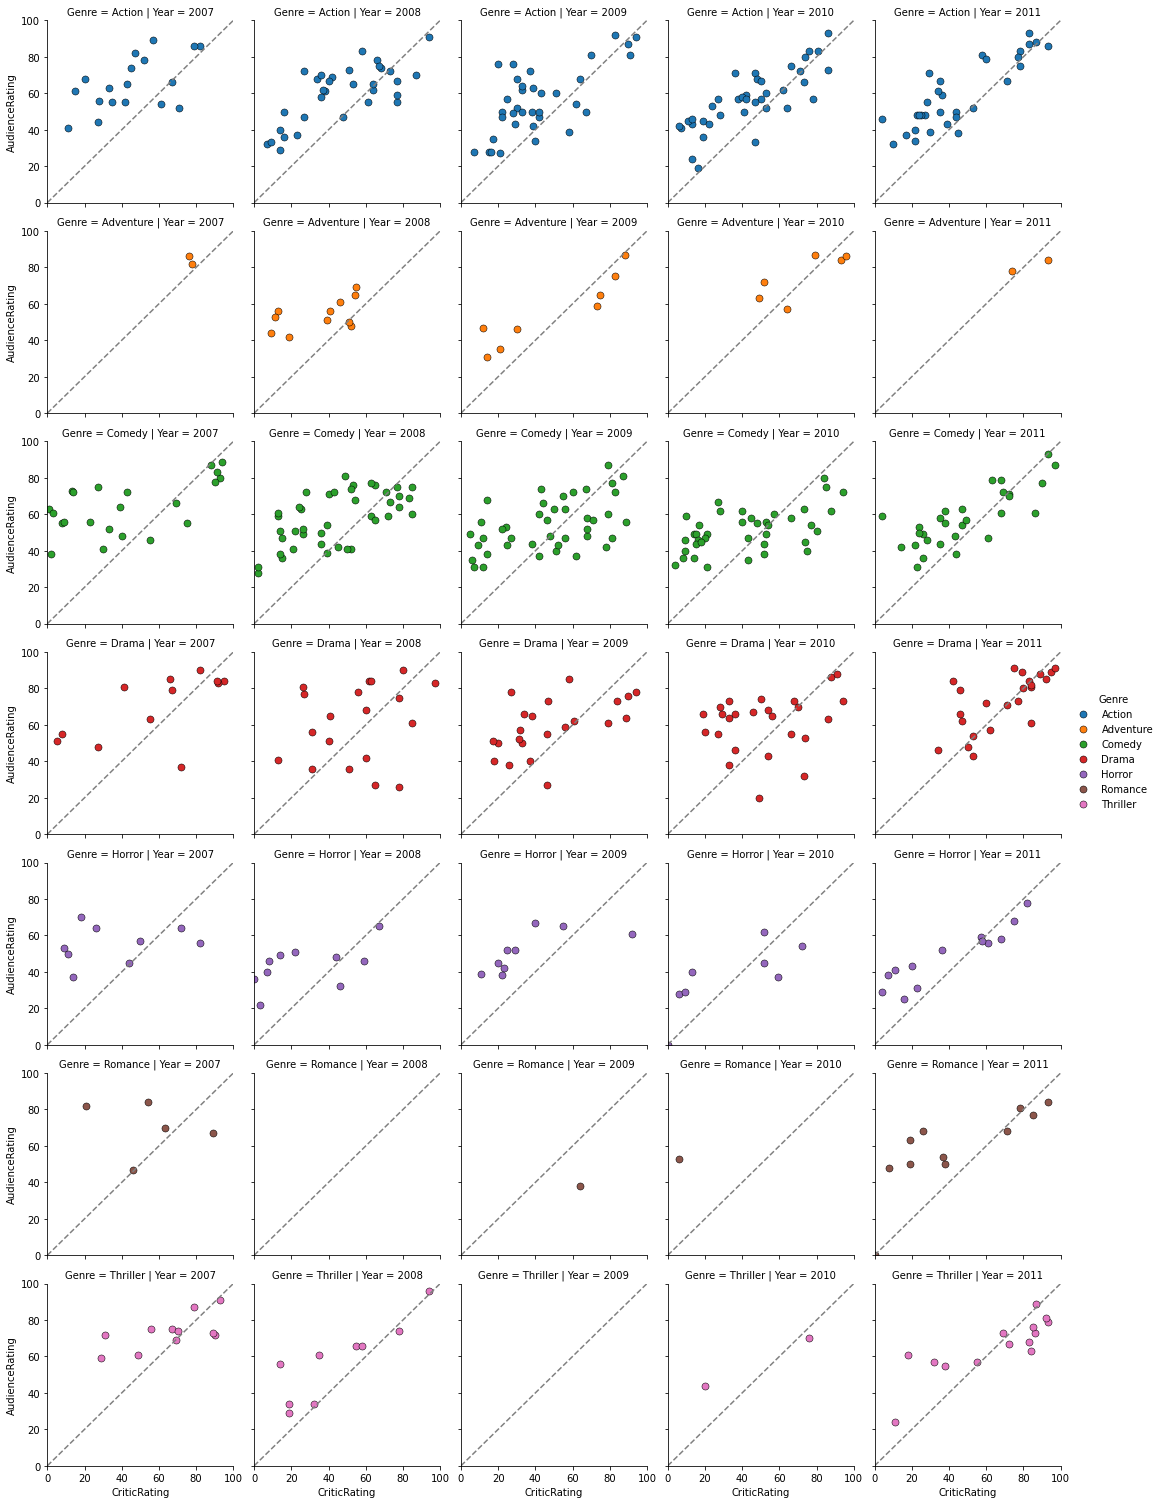

In [52]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend()

In [53]:
    #building dashboard

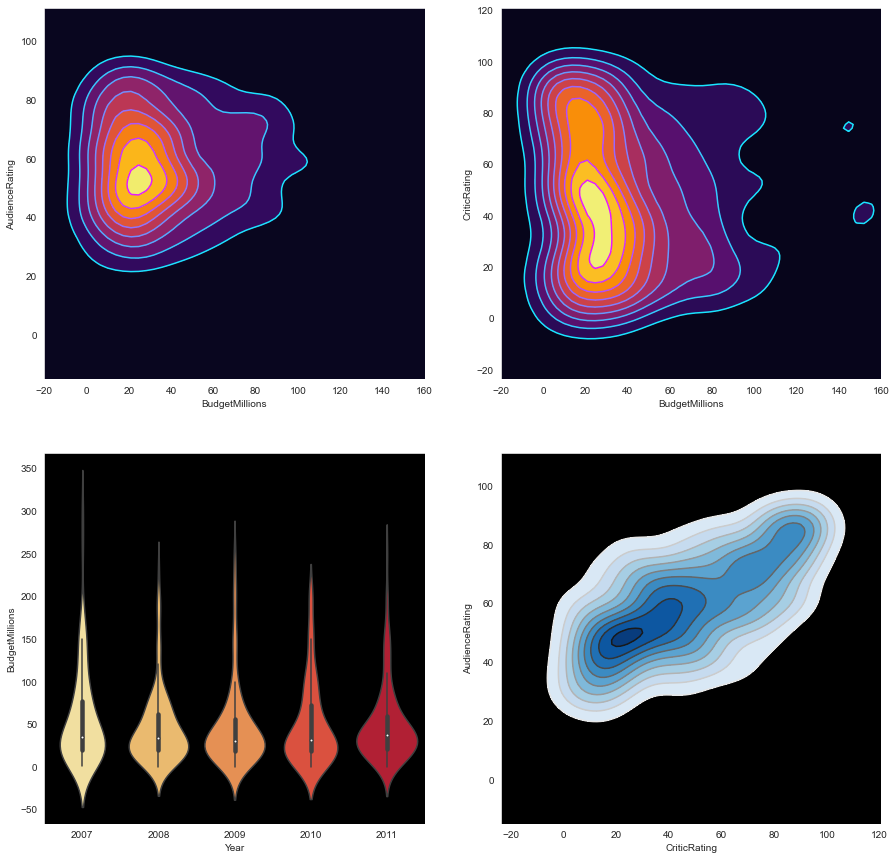

In [81]:
sns.set_style("dark", {"axes.facecolor":'black'})
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,0])
kb = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='cool', ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='cool', ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], palette='YlOrRd')
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues', ax=axes[1,1])
klb = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])
plt.show()